In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [3]:
# ===============================
# 1️⃣ Load Dataset from Directory
# ===============================
train_dir = "BreakHis/train/"

batch_size = 32
img_size = (224, 224)  # EfficientNetV2 input size

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    shuffle=True,
    batch_size=batch_size,
    image_size=img_size
)

Found 7910 files belonging to 2 classes.


In [5]:
# Check classes
class_names = train_dataset.class_names
print(f"✅ Classes Found: {class_names}")


✅ Classes Found: ['Benign', 'Malignant']


In [7]:
# ===============================
# 2️⃣ Normalize & Split Dataset
# ===============================
# Normalize images to [0,1] scale
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.map(lambda x, y: (x / 255.0, y)).cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [9]:
# Split into train & validation
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size

train_ds = train_dataset.take(train_size)
val_ds = train_dataset.skip(train_size)

In [13]:
# ===============================
# 3️⃣ Build EfficientNetV2 Model
# ===============================
model = keras.Sequential([
    keras.Input(shape=(224, 224, 3)),  # Explicit Input layer
    layers.Rescaling(1./255),  # Normalize images
    layers.Conv2D(32, 3, activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")  # Binary classification
])

In [15]:
# ===============================
# 4️⃣ Compile Model
# ===============================
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [17]:
# ===============================
# 5️⃣ Train Model
# ===============================
epochs = 10  # Adjust as needed
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 167s 738ms/step - accuracy: 0.6713 - loss: 0.6446 - val_accuracy: 0.6925 - val_loss: 0.6236
Epoch 2/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 165s 835ms/step - accuracy: 0.6855 - loss: 0.6304 - val_accuracy: 0.6925 - val_loss: 0.6193
Epoch 3/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 167s 845ms/step - accuracy: 0.6736 - loss: 0.6385 - val_accuracy: 0.6656 - val_loss: 0.6382
Epoch 4/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 163s 824ms/step - accuracy: 0.6712 - loss: 0.6363 - val_accuracy: 0.7025 - val_loss: 0.6156
Epoch 5/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 161s 812ms/step - accuracy: 0.6840 - loss: 0.6313 - val_accuracy: 0.6825 - val_loss: 0.6287
Epoch 6/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 165s 836ms/step - accuracy: 0.6822 - loss: 0.6269 - val_accuracy: 0.6869 - val_loss: 0.6218
Epoch 7/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 157s 791ms/step - accuracy: 0.6731 - loss: 0.6361 - val_accuracy: 0.6981 - val_loss: 0.6139
Epoch 8/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 165s 833ms/step - accuracy: 0.6763 -

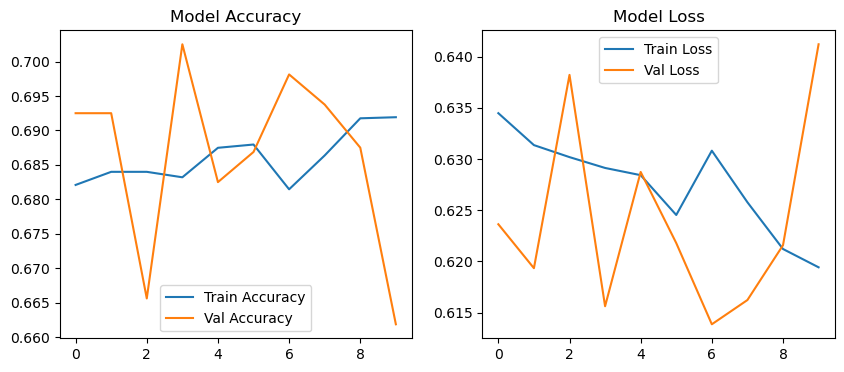

In [19]:
# ===============================
# 6️⃣ Plot Accuracy & Loss
# ===============================
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Model Loss")
plt.show()